In [ ]:
# Impor library yang diperlukan
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from google.colab import drive
import cv2

In [ ]:
# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Tentukan path dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Dataset_UAS'



Mounted at /content/drive


In [ ]:
# Load data dan preprocessing
image_data = []
gender_labels = []

# Loop melalui setiap folder dalam direktori dataset
for folder in os.listdir(dataset_path):
    if folder in ['train_data', 'testing_data']:
        folder_path = os.path.join(dataset_path, folder)
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if subfolder in ['Laki-Laki', 'Perempuan']:
                for file_name in os.listdir(subfolder_path):
                    if file_name.endswith('.jpg'):
                        image_path = os.path.join(subfolder_path, file_name)
                        # image = Image.open(image_path).convert('RGB')
                        image = image.resize((64, 64))  # Resize gambar menjadi ukuran yang diinginkan
                        image_data.append(np.array(image))

                        # Menyimpan label jenis kelamin berdasarkan nama folder
                        gender_label = subfolder
                        gender_labels.append(gender_label)

# Melakukan encoding label gender menjadi angka
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(gender_labels)

# Membagi data menjadi train set dan validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, encoded_labels, test_size=0.2, random_state=42)

# Normalisasi data gambar
X_train = np.array(X_train) / 255.0
X_val = np.array(X_val) / 255.0

# Membuat model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Augmentasi data gambar
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
datagen.fit(X_train)

# Melatih model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), steps_per_epoch=len(X_train) // 32,
                    epochs=10, validation_data=(X_val, y_val))



Epoch 1/10
11/11 [==============================] - 6s 384ms/step - loss: 0.4939 - accuracy: 0.7898 - val_loss: 0.5371 - val_accuracy: 0.7865
Epoch 2/10
11/11 [==============================] - 3s 271ms/step - loss: 0.4511 - accuracy: 0.8381 - val_loss: 0.5185 - val_accuracy: 0.7865
Epoch 3/10
11/11 [==============================] - 4s 338ms/step - loss: 0.4560 - accuracy: 0.8381 - val_loss: 0.5206 - val_accuracy: 0.7865
Epoch 4/10
11/11 [==============================] - 5s 419ms/step - loss: 0.4717 - accuracy: 0.8381 - val_loss: 0.5522 - val_accuracy: 0.7865
Epoch 5/10
11/11 [==============================] - 3s 308ms/step - loss: 0.4534 - accuracy: 0.8381 - val_loss: 0.5209 - val_accuracy: 0.7865
Epoch 6/10
11/11 [==============================] - 3s 281ms/step - loss: 0.4608 - accuracy: 0.8381 - val_loss: 0.5187 - val_accuracy: 0.7865
Epoch 7/10
11/11 [==============================] - 4s 345ms/step - loss: 0.4499 - accuracy: 0.8381 - val_loss: 0.5234 - val_accuracy: 0.7865
Epoch 

Text(0.5, 1.0, 'Training and Validation Loss')

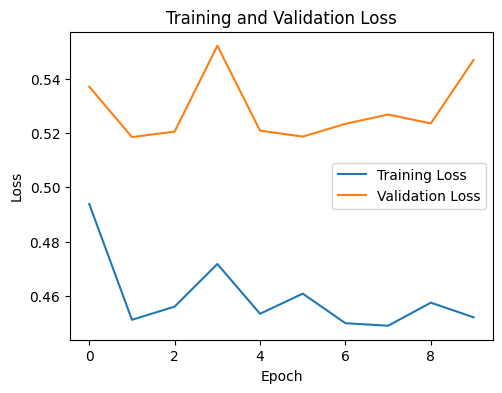

In [ ]:
# Visualisasi training loss dan accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')



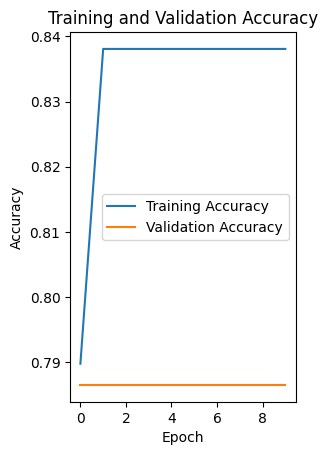

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.show()



In [ ]:
# Pengujian (testing) model
# Anda dapat menggunakan folder 'testing_data' untuk melakukan pengujian model

testing_data_path = os.path.join(dataset_path, 'testing_data')
test_image_data = []
test_gender_labels = []

# Loop melalui setiap folder dalam direktori testing_data
for subfolder_name in os.listdir(testing_data_path):
    subfolder_path = os.path.join(testing_data_path, subfolder_name)
    for file_name in os.listdir(subfolder_path):
        if file_name.endswith('.jpg'):
            image_path = os.path.join(subfolder_path, file_name)
            # image = Image.open(image_path).convert('RGB')
            image = image.resize((64, 64))  # Resize gambar menjadi ukuran yang diinginkan
            test_image_data.append(np.array(image))

            # Menyimpan label jenis kelamin berdasarkan nama folder
            gender_label = subfolder_name
            test_gender_labels.append(gender_label)

# Normalisasi data gambar pengujian
X_test = np.array(test_image_data) / 255.0

# Evaluasi model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, label_encoder.transform(test_gender_labels))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


1/1 [==============================] - 0s 184ms/step - loss: 0.6172 - accuracy: 0.7500
Test Loss: 0.6172141432762146
Test Accuracy: 0.75


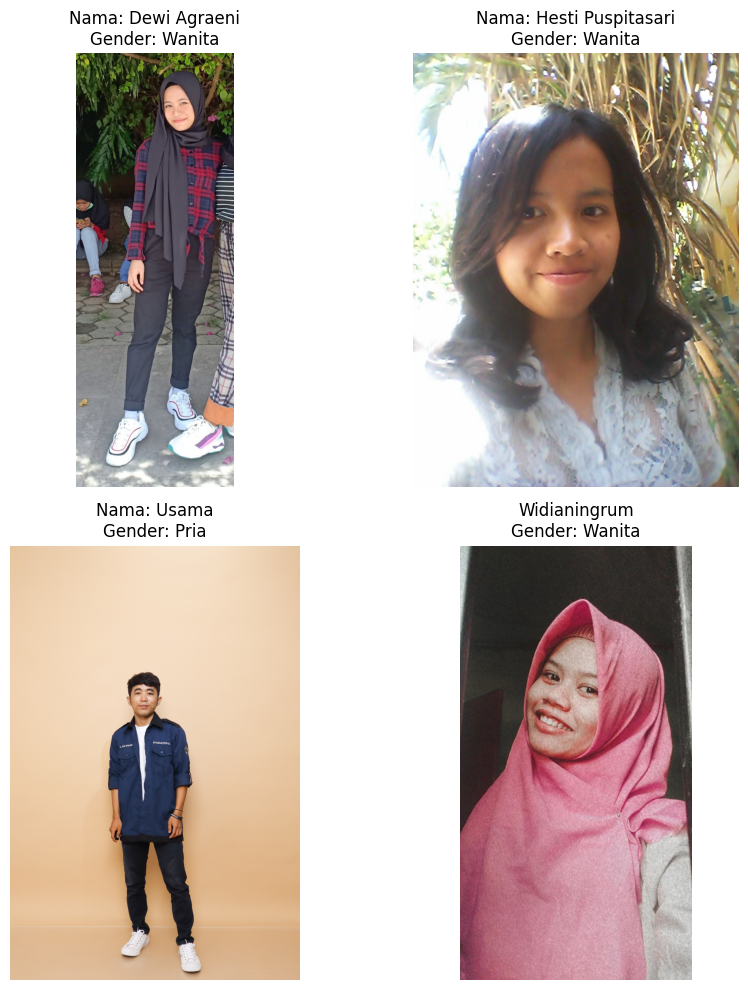

In [ ]:
def predict_image(model, image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (height, width))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    _, gender_pred, person_pred = model.predict(img)

    gender_labels = {0: 'Male', 1: 'Female'}
    person_labels = {0: 'Person 1', 1: 'Person 2', 2: 'Person 3', 3: 'Person 4'}

    gender_class = np.argmax(gender_pred)
    person_class = np.argmax(person_pred)

    gender = gender_labels[gender_class]
    person = person_labels[person_class]

    return cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB), gender, person

# Menentukan folder tempat gambar-gambar berada
testing_folder = '/content/gdrive/MyDrive/Colab Notebooks/Dataset/GenderPerson/test'

# Mendapatkan daftar file gambar di folder testing
image_files = os.listdir(testing_folder)

# Membuat subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

# Memuat dan menampilkan gambar-gambar pada subplot
for i in range(4):
    image_path = os.path.join(testing_folder, image_files[i])
    img, gender, person = predict_image(model, image_path)

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'Gender: {gender}, Person: {person}')

# Membersihkan hasil output sebelum menampilkan subplot
plt.clf()
plt.tight_layout()
plt.show()